In [2]:
import pandas as pd
import openpyxl
import numpy as np

In [3]:
df_Rosario= pd.read_excel('./Rosario F.xlsx')

Debera catacterizar el voto utilizando los datos de la muestra y cualquier otra fuente secundaria que considere. Debera subir el codigo utilizado al repositorio y preprar un informe con los descubrimientos mas relevantes.
1. Porcentaje de voto por edad y por genero
2. Datos de georreferenciación
3. Dos regresiones: 1 con edad y 1 con genero.
4. Cruzar voto por radio. 

In [4]:
df_Rosario.shape


(372, 8)

In [5]:
df_Rosario.dtypes


interview__key            object
METODO                    object
Coord1__Latitude         float64
Coord1__Longitude        float64
EDAD                      object
GENERO                    object
INT DE VOTO X ESPACIO     object
RADIO                      int64
dtype: object

In [6]:
df_Rosario.head

<bound method NDFrame.head of     interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
..             ...    ...               ...                ...       ...   
367   347615540259    IVR        -32.941000         -60.688295  56 y mas   
368   347615540658    IVR        -32.970114         -60.653051   16 a 25   
369   347615672682    IVR        -32.907759         -60.752721  56 y mas   
370   348715470373    IVR        -32.942161         -60.639935  56 y mas   
371   387154502466    IVR        -32.957100         -60.637709  56 y mas   

        GENERO INT DE VOTO X ESPACIO      RADIO  
0    Ma

In [7]:
df_Rosario['INT DE VOTO X ESPACIO'] = df_Rosario['INT DE VOTO X ESPACIO'].astype(str)


frecuencias = df_Rosario['INT DE VOTO X ESPACIO'].value_counts()


porcentajes = (frecuencias / frecuencias.sum()) * 100


resultados = pd.DataFrame({
    'Categoría': frecuencias.index,
    'Frecuencia': frecuencias.values,
    'Porcentaje': porcentajes.values
})


print(resultados)


        Categoría  Frecuencia  Porcentaje
0             JxC          90   24.193548
1             FdT          80   21.505376
2  NINGUNO/NOSABE          72   19.354839
3     LIBERTARIOS          57   15.322581
4           OTROS          35    9.408602
5             PNK          26    6.989247
6             FIT          12    3.225806


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

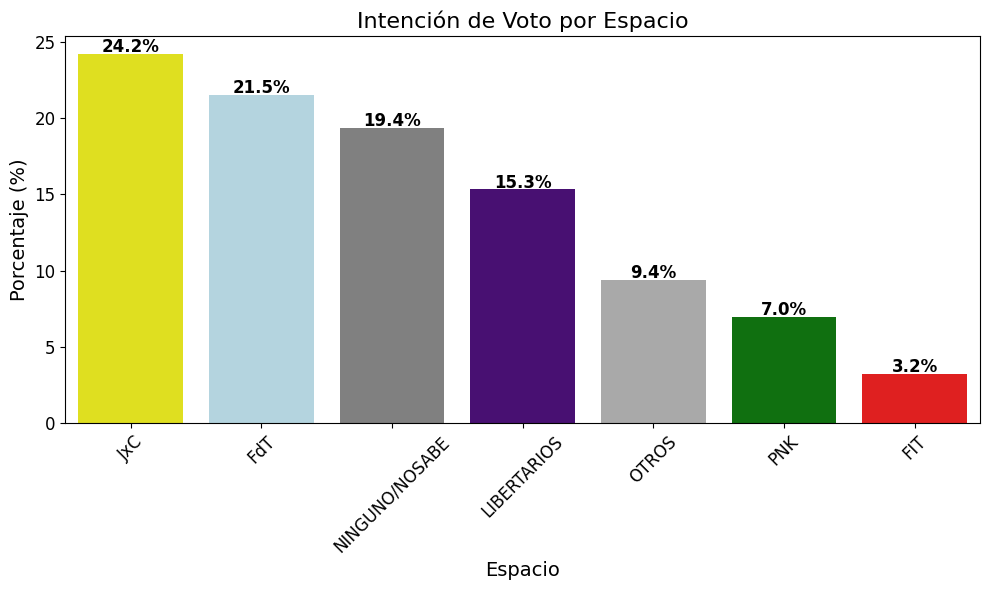

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


resultados['Color'] = resultados['Categoría'].map(colores)


plt.figure(figsize=(10, 6))

ax = sns.barplot(data=resultados, x='Categoría', y='Porcentaje', 
                 hue='Categoría', palette=colores)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')  


plt.title('Intención de Voto por Espacio', fontsize=16)
plt.xlabel('Espacio', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

In [9]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['EDAD'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_EDAD_VOTO = tabla_cruzada_porcentaje_columna.copy()


print(df_EDAD_VOTO)



EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [10]:
df_EDAD_VOTO.dtypes


EDAD
16 a 25     float64
26 a 35     float64
36 a 45     float64
46 a 55     float64
56 y mas    float64
dtype: object

In [11]:
print(df_EDAD_VOTO.columns)


Index(['16 a 25', '26 a 35', '36 a 45', '46 a 55', '56 y mas'], dtype='object', name='EDAD')


In [12]:
print(df_EDAD_VOTO)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [13]:
df_EDAD_VOTO.reset_index(inplace=True)

In [14]:

df_larga = df_EDAD_VOTO.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='EDAD', 
                                 value_name='Porcentaje')


print(df_larga.head())

  INT DE VOTO X ESPACIO     EDAD  Porcentaje
0                   FIT  16 a 25    3.571429
1                   FdT  16 a 25   25.000000
2                   JxC  16 a 25   25.000000
3           LIBERTARIOS  16 a 25   25.000000
4        NINGUNO/NOSABE  16 a 25   21.428571


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_40181/3550010749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO',
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.

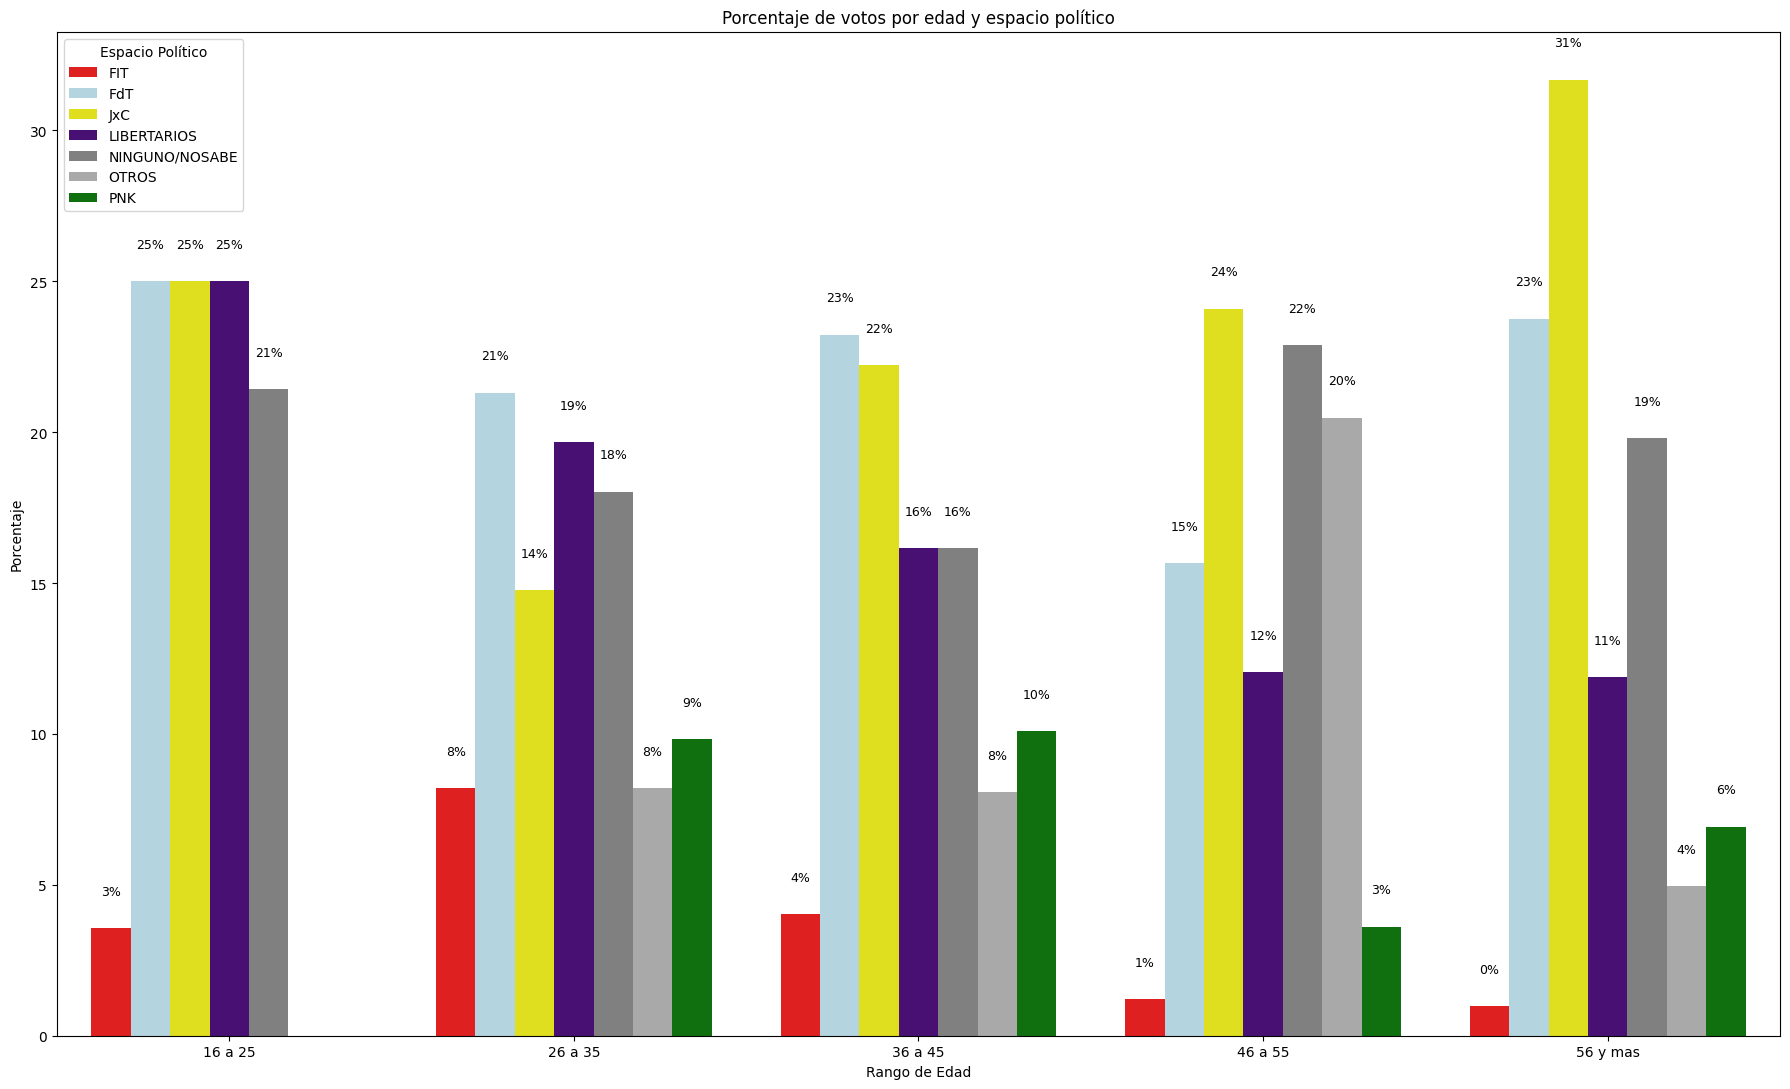

In [15]:

colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, ci=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)



plt.title('Porcentaje de votos por edad y espacio político')
plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje')
plt.legend(title='Espacio Político', loc='upper left')


plt.tight_layout()
plt.show()

In [16]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['GENERO'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_porcentajes2 = tabla_cruzada_porcentaje_columna.copy()


print(df_porcentajes2)



GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                     3.030303   2.525253  22.222222
FdT                    21.212121  22.727273   0.000000
JxC                    25.454545  24.242424   0.000000
LIBERTARIOS             6.666667  22.222222  22.222222
NINGUNO/NOSABE         24.242424  14.141414  44.444444
OTROS                  11.515152   7.575758  11.111111
PNK                     7.878788   6.565657   0.000000


In [17]:
df_porcentajes2.reset_index(inplace=True)


df_larga2 = df_porcentajes2.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='GENERO', 
                                 value_name='Porcentaje')


print(df_larga2.head())


  INT DE VOTO X ESPACIO    GENERO  Porcentaje
0                   FIT  Femenino    3.030303
1                   FdT  Femenino   21.212121
2                   JxC  Femenino   25.454545
3           LIBERTARIOS  Femenino    6.666667
4        NINGUNO/NOSABE  Femenino   24.242424


In [18]:
print(df_porcentajes2.columns)


Index(['INT DE VOTO X ESPACIO', 'Femenino', 'Masculino', 'Otro'], dtype='object', name='GENERO')


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_40181/4032621733.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO',
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions

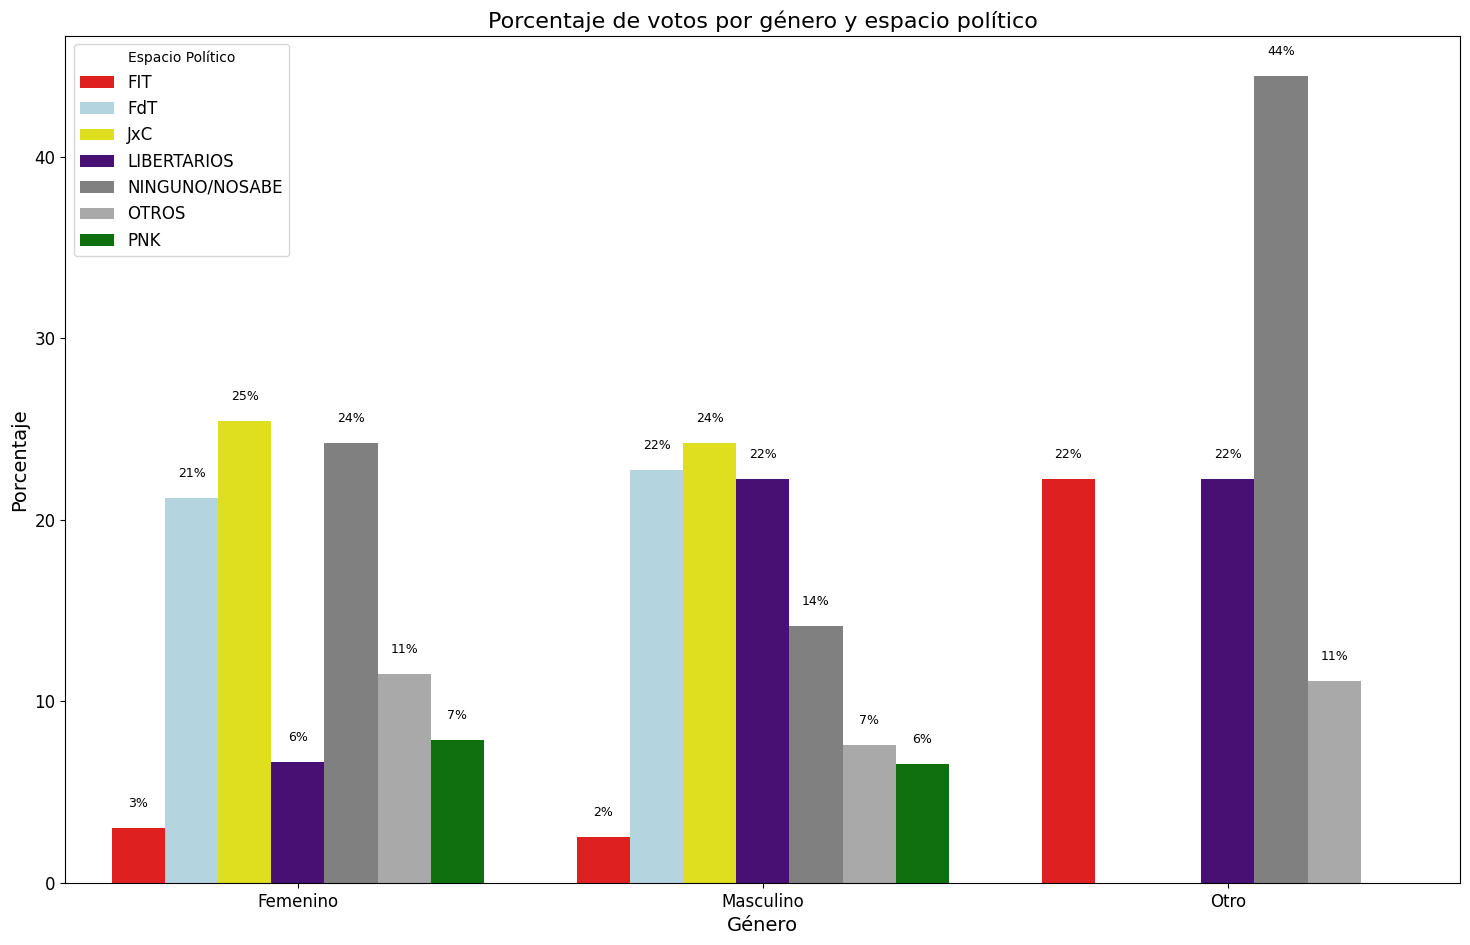

In [19]:
df_larga2 = df_larga2[['GENERO', 'INT DE VOTO X ESPACIO', 'Porcentaje']]


df_larga2.reset_index(drop=True, inplace=True)


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, ci=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)


plt.title('Porcentaje de votos por género y espacio político', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Espacio Político', loc='upper left', fontsize=12)


In [20]:
valores_INTNVOTO = df_Rosario ['INT DE VOTO X ESPACIO'].unique() 
valores_EDAD = df_Rosario ['EDAD'].unique()

print("Valores únicos en INTENCIÓN DE VOTO:", valores_INTNVOTO) 
print("Valores únicos en EDAD:", valores_EDAD)

Valores únicos en INTENCIÓN DE VOTO: ['LIBERTARIOS' 'OTROS' 'NINGUNO/NOSABE' 'JxC' 'FdT' 'PNK' 'FIT']
Valores únicos en EDAD: ['56 y mas' '36 a 45' '26 a 35' '46 a 55' '16 a 25']


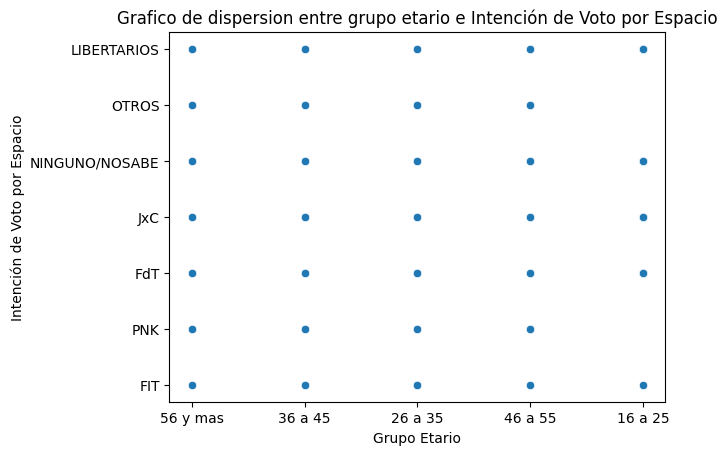

In [21]:
sns.scatterplot(x='EDAD', y='INT DE VOTO X ESPACIO', data=df_Rosario)

plt.title('Grafico de dispersion entre grupo etario e Intención de Voto por Espacio')
plt.xlabel('Grupo Etario')
plt.ylabel('Intención de Voto por Espacio')
plt.show()

In [22]:
df_Rosario_dummies = pd.get_dummies(
    df_Rosario, 
    columns=['EDAD','GENERO', 'INT DE VOTO X ESPACIO'], 
    drop_first=False  # Incluir todas las categorías
)

columnas_a_eliminar = ['RADIO', 'Coord1__Latitude', 'Coord1__Longitude', 'METODO', 'interview__key']
df_Rosario_final = df_Rosario_dummies.drop(columns=columnas_a_eliminar, axis=1)

df_Rosario_final = df_Rosario_final.astype(int)

print(df_Rosario_final)

     EDAD_16 a 25  EDAD_26 a 35  EDAD_36 a 45  EDAD_46 a 55  EDAD_56 y mas  \
0               0             0             0             0              1   
1               0             0             1             0              0   
2               0             0             0             0              1   
3               0             1             0             0              0   
4               0             0             1             0              0   
..            ...           ...           ...           ...            ...   
367             0             0             0             0              1   
368             1             0             0             0              0   
369             0             0             0             0              1   
370             0             0             0             0              1   
371             0             0             0             0              1   

     GENERO_Femenino  GENERO_Masculino  GENERO_Otro  \
0       

Optimization terminated successfully.
         Current function value: 0.132760
         Iterations 9
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FIT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      367
Method:                                  MLE   Df Model:                            4
Date:                       Mon, 25 Nov 2024   Pseudo R-squ.:                 0.06839
Time:                               23:10:08   Log-Likelihood:                -49.387
converged:                              True   LL-Null:                       -53.012
Covariance Type:                   nonrobust   LLR p-value:                    0.1232
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.9819   2.06e+07  -1.45e-07

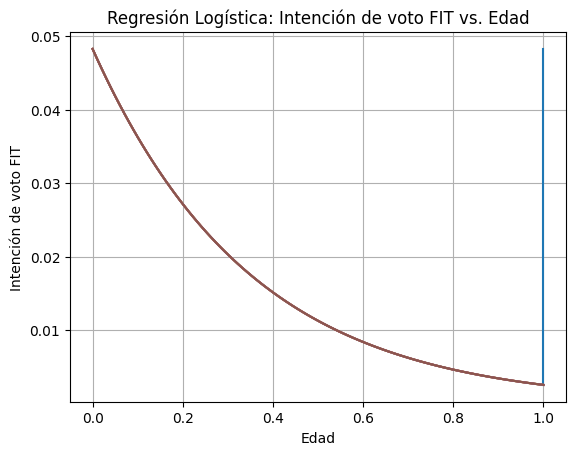

In [24]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_FIT'] 
X = sm.add_constant(X)

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto FIT')
plt.title('Regresión Logística: Intención de voto FIT vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.517250
         Iterations 6
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FdT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      367
Method:                                  MLE   Df Model:                            4
Date:                       Mon, 25 Nov 2024   Pseudo R-squ.:                0.006389
Time:                               23:10:13   Log-Likelihood:                -192.42
converged:                              True   LL-Null:                       -193.65
Covariance Type:                   nonrobust   LLR p-value:                    0.6492
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0749   1.56e+07  -6.89e-08

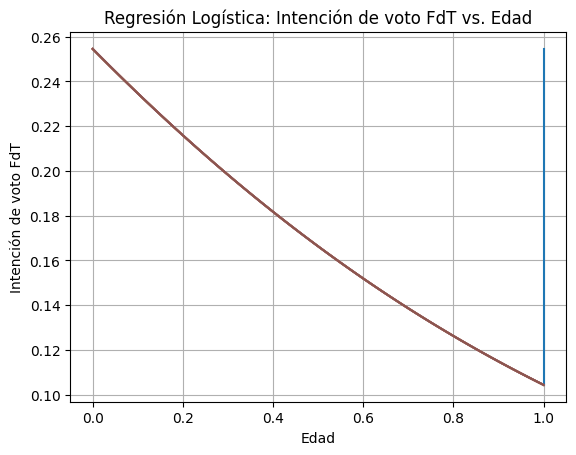

In [25]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_FdT'] 
X = sm.add_constant(X)
modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto FdT')
plt.title('Regresión Logística: Intención de voto FdT vs. Edad')
plt.grid(True)
plt.show()

         Current function value: 0.544655
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_JxC   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      367
Method:                                  MLE   Df Model:                            4
Date:                       Mon, 25 Nov 2024   Pseudo R-squ.:                 0.01562
Time:                               23:10:17   Log-Likelihood:                -202.61
converged:                             False   LL-Null:                       -205.83
Covariance Type:                   nonrobust   LLR p-value:                    0.1691
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0035   5.16e+06  -1.94e-07      1.000   -1.01e+07    1.01e+07


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


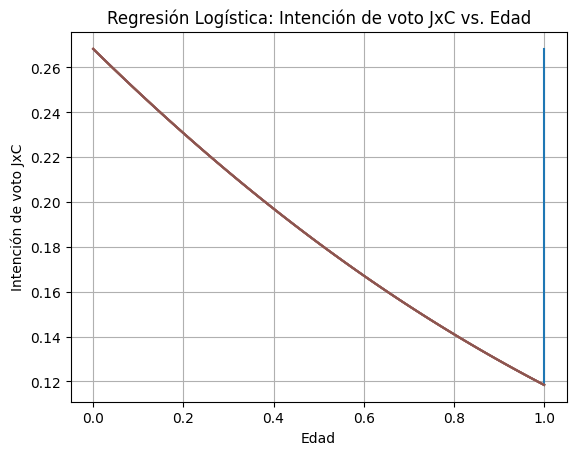

In [26]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_JxC'] 
X = sm.add_constant(X)
modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto JxC')
plt.title('Regresión Logística: Intención de voto JxC vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.422409
         Iterations 6
                                   Logit Regression Results                                  
Dep. Variable:     INT DE VOTO X ESPACIO_LIBERTARIOS   No. Observations:                  372
Model:                                         Logit   Df Residuals:                      367
Method:                                          MLE   Df Model:                            4
Date:                               Mon, 25 Nov 2024   Pseudo R-squ.:                 0.01367
Time:                                       23:10:20   Log-Likelihood:                -157.14
converged:                                      True   LL-Null:                       -159.31
Covariance Type:                           nonrobust   LLR p-value:                    0.3600
                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

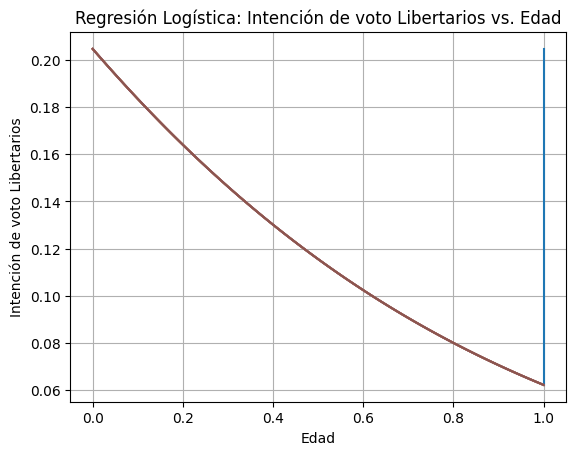

In [27]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_LIBERTARIOS'] 
X = sm.add_constant(X)
modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Libertarios')
plt.title('Regresión Logística: Intención de voto Libertarios vs. Edad')
plt.grid(True)
plt.show()

         Current function value: 0.287833
         Iterations: 35
                                Logit Regression Results                               
Dep. Variable:     INT DE VOTO X ESPACIO_OTROS   No. Observations:                  372
Model:                                   Logit   Df Residuals:                      367
Method:                                    MLE   Df Model:                            4
Date:                         Mon, 25 Nov 2024   Pseudo R-squ.:                 0.07713
Time:                                 23:10:23   Log-Likelihood:                -107.07
converged:                               False   LL-Null:                       -116.02
Covariance Type:                     nonrobust   LLR p-value:                  0.001292
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.6108        nan        nan        nan         

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


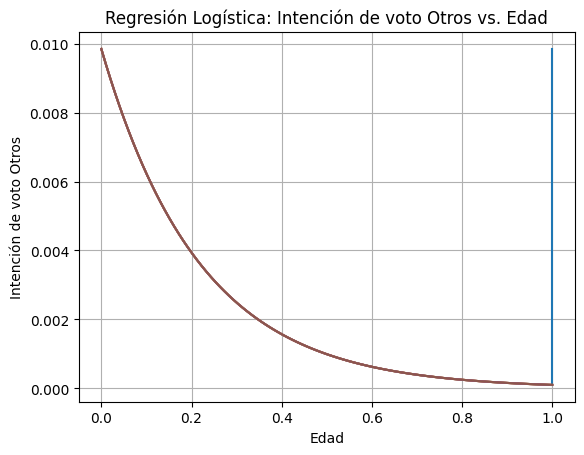

In [28]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_OTROS'] 
X = sm.add_constant(X)
modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Otros')
plt.title('Regresión Logística: Intención de voto Otros vs. Edad')
plt.grid(True)
plt.show()

         Current function value: 0.489350
         Iterations: 35
                                    Logit Regression Results                                    
Dep. Variable:     INT DE VOTO X ESPACIO_NINGUNO/NOSABE   No. Observations:                  372
Model:                                            Logit   Df Residuals:                      367
Method:                                             MLE   Df Model:                            4
Date:                                  Mon, 25 Nov 2024   Pseudo R-squ.:                0.004024
Time:                                          23:10:28   Log-Likelihood:                -182.04
converged:                                        False   LL-Null:                       -182.77
Covariance Type:                              nonrobust   LLR p-value:                    0.8318
                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


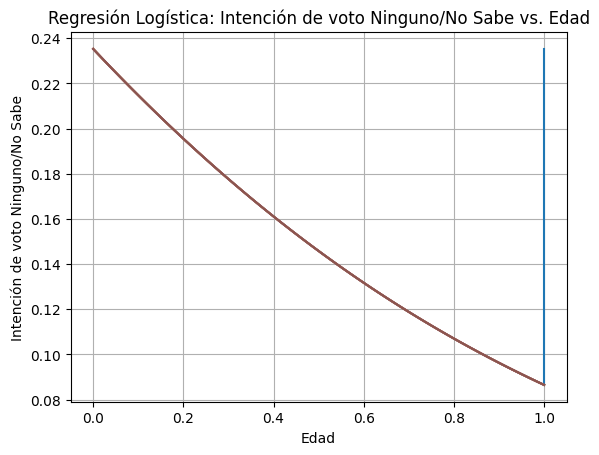

In [29]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final[['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55', 'EDAD_56 y mas']]
y = df_Rosario_final['INT DE VOTO X ESPACIO_NINGUNO/NOSABE'] 
X = sm.add_constant(X)
modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Ninguno/No Sabe')
plt.title('Regresión Logística: Intención de voto Ninguno/No Sabe vs. Edad')
plt.grid(True)
plt.show()

REGRESION LOGISTICA INT DE VOTO Y GENERO

In [ ]:
import statsmodels.api as sm
import pandas as pd
# GRÁFICO
import matplotlib.pyplot as plt
import seaborn as sns
df_Rosario_final.head()
print(df_Rosario_final.dtypes)

EDAD_ORDINAL                            int64
GENERO_Femenino                         int64
GENERO_Masculino                        int64
GENERO_Otro                             int64
INT DE VOTO X ESPACIO_FIT               int64
INT DE VOTO X ESPACIO_FdT               int64
INT DE VOTO X ESPACIO_JxC               int64
INT DE VOTO X ESPACIO_LIBERTARIOS       int64
INT DE VOTO X ESPACIO_NINGUNO/NOSABE    int64
INT DE VOTO X ESPACIO_OTROS             int64
INT DE VOTO X ESPACIO_PNK               int64
dtype: object


In [ ]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_FdT']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.514474
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FdT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Mon, 25 Nov 2024   Pseudo R-squ.:                 0.01172
Time:                               19:18:48   Log-Likelihood:                -191.38
converged:                             False   LL-Null:                       -193.65
Covariance Type:                   nonrobust   LLR p-value:                    0.1033
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8817        nan        nan        nan         nan    

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7172\1972838993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


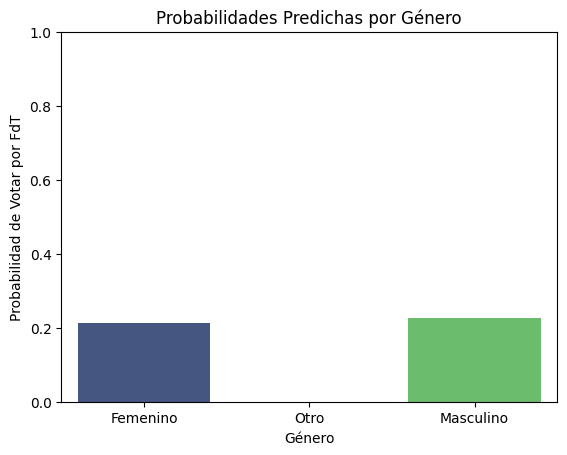

In [ ]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por FdT')
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()


In [ ]:
GENEROS = ['Femenino', 'Masculino', 'Otro']

In [ ]:
probabilidades_predichas = result.predict(X)

In [ ]:
promedio_prob_genero = [
    np.mean(probabilidades_predichas[df_Rosario_final['GENERO_Femenino'] == 1]),
    np.mean(probabilidades_predichas[df_Rosario_final['GENERO_Masculino'] == 1]),
    np.mean(probabilidades_predichas[df_Rosario_final['GENERO_Otro'] == 1]),
]

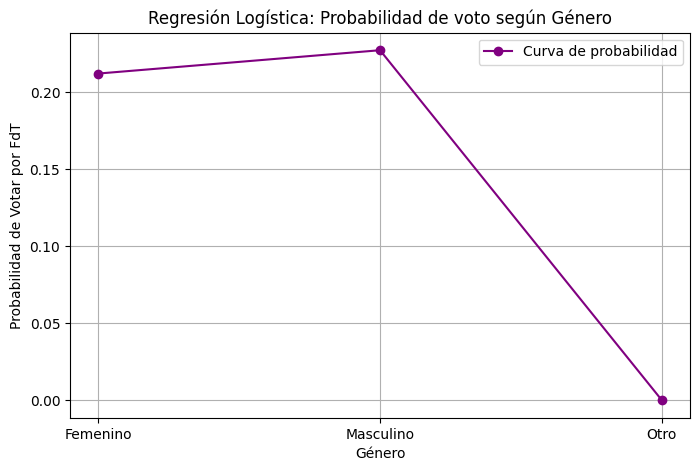

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por FdT')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_JxC']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.546409
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_JxC   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Sun, 24 Nov 2024   Pseudo R-squ.:                 0.01246
Time:                               23:32:35   Log-Likelihood:                -203.26
converged:                             False   LL-Null:                       -205.83
Covariance Type:                   nonrobust   LLR p-value:                   0.07702
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8013        nan        nan        nan         nan    

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7172\873174316.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


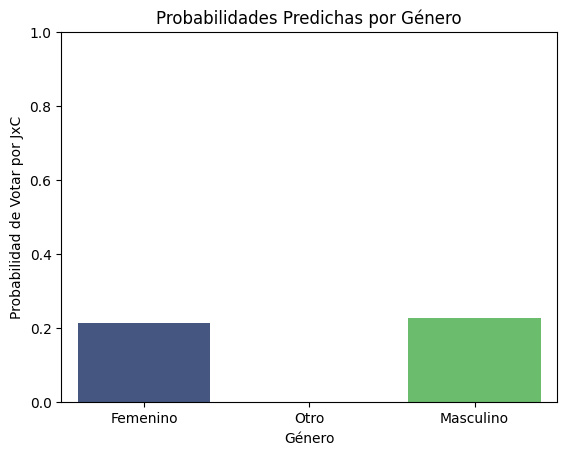

In [ ]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por JxC') 
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

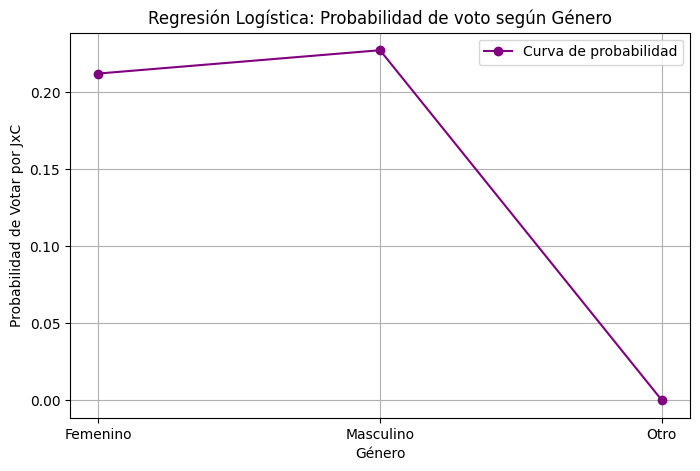

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por JxC')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_LIBERTARIOS']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.403394
         Iterations: 35
                                   Logit Regression Results                                  
Dep. Variable:     INT DE VOTO X ESPACIO_LIBERTARIOS   No. Observations:                  372
Model:                                         Logit   Df Residuals:                      369
Method:                                          MLE   Df Model:                            2
Date:                               Sun, 24 Nov 2024   Pseudo R-squ.:                 0.05807
Time:                                       21:39:11   Log-Likelihood:                -150.06
converged:                                     False   LL-Null:                       -159.31
Covariance Type:                           nonrobust   LLR p-value:                 9.596e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const       

c:\Users\Candela\anaconda3\envs\Cande\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Candela\AppData\Local\Temp\ipykernel_13576\1286028094.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


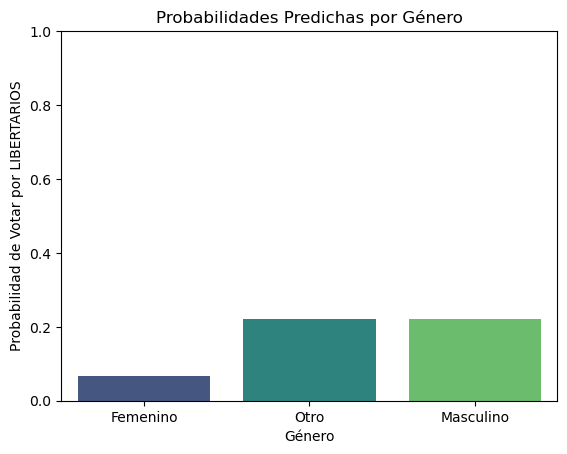

In [ ]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por LIBERTARIOS') 
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

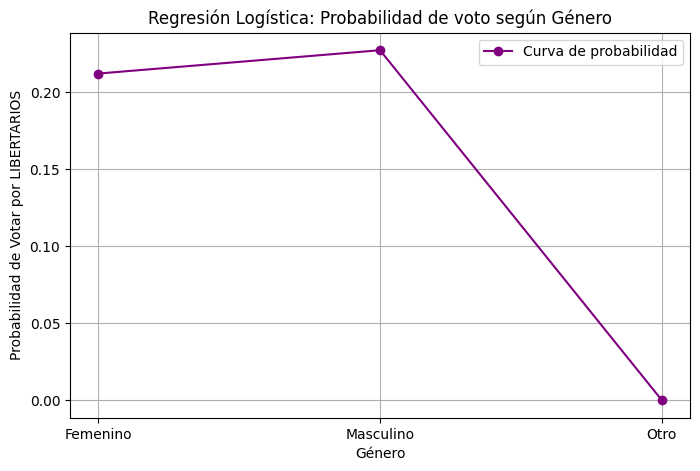

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por LIBERTARIOS')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_NINGUNO/NOSABE']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.479190
         Iterations 6
                                    Logit Regression Results                                    
Dep. Variable:     INT DE VOTO X ESPACIO_NINGUNO/NOSABE   No. Observations:                  372
Model:                                            Logit   Df Residuals:                      369
Method:                                             MLE   Df Model:                            2
Date:                                  Sun, 24 Nov 2024   Pseudo R-squ.:                 0.02470
Time:                                          21:39:11   Log-Likelihood:                -178.26
converged:                                         True   LL-Null:                       -182.77
Covariance Type:                              nonrobust   LLR p-value:                   0.01094
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

C:\Users\Candela\AppData\Local\Temp\ipykernel_13576\157392070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


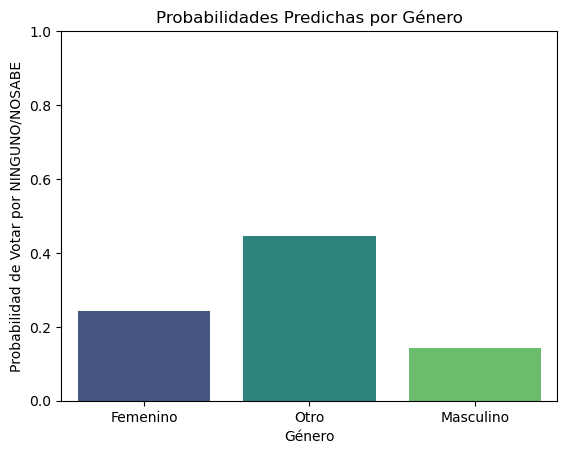

In [ ]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por NINGUNO/NOSABE') 
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

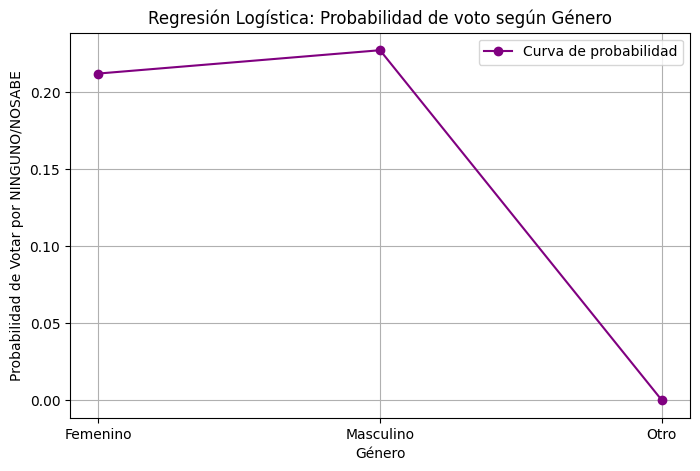

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por NINGUNO/NOSABE')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_OTROS']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.309650
         Iterations 10
                                Logit Regression Results                               
Dep. Variable:     INT DE VOTO X ESPACIO_OTROS   No. Observations:                  372
Model:                                   Logit   Df Residuals:                      369
Method:                                    MLE   Df Model:                            2
Date:                         Sun, 24 Nov 2024   Pseudo R-squ.:                0.007185
Time:                                 21:39:11   Log-Likelihood:                -115.19
converged:                                True   LL-Null:                       -116.02
Covariance Type:                     nonrobust   LLR p-value:                    0.4345
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.

C:\Users\Candela\AppData\Local\Temp\ipykernel_13576\2982350561.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


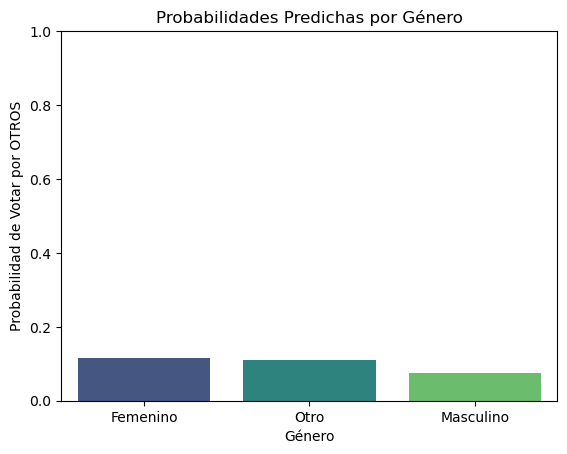

In [ ]:

grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por OTROS')  
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

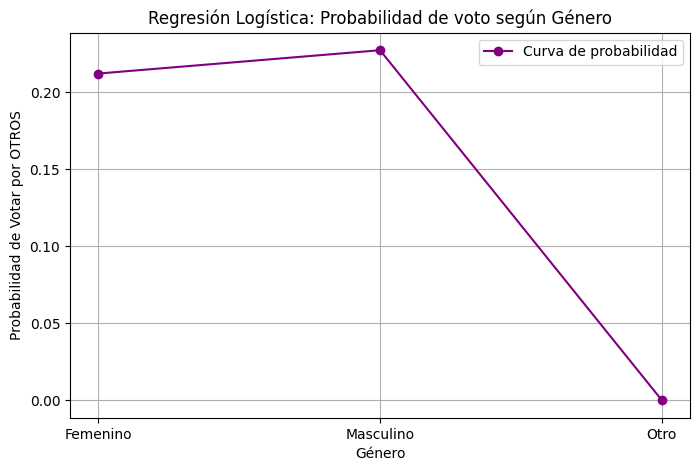

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por OTROS')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_FIT']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.135763
         Iterations 8
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FIT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Sun, 24 Nov 2024   Pseudo R-squ.:                 0.04732
Time:                               21:39:11   Log-Likelihood:                -50.504
converged:                              True   LL-Null:                       -53.012
Covariance Type:                   nonrobust   LLR p-value:                   0.08140
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.0929   4.86e+07  

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\969669001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


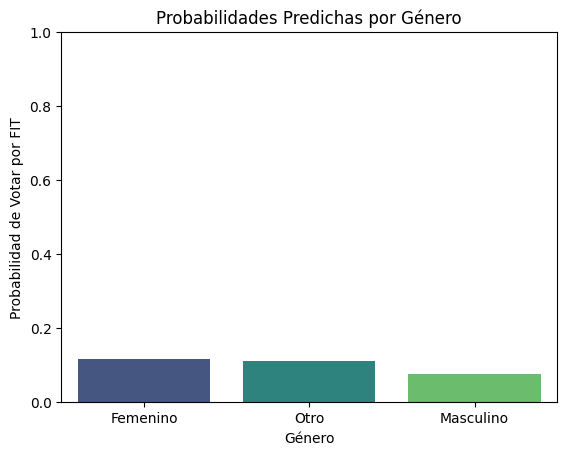

In [ ]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por FIT')  
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

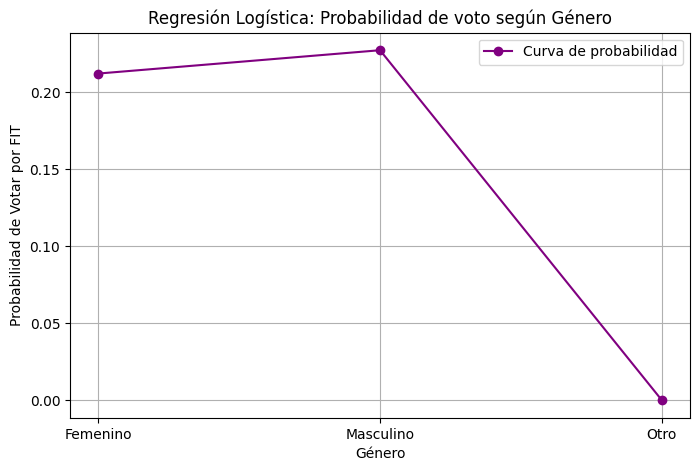

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por FIT')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_PNK']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.251273
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_PNK   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Sun, 24 Nov 2024   Pseudo R-squ.:                0.008240
Time:                               22:00:54   Log-Likelihood:                -93.474
converged:                             False   LL-Null:                       -94.250
Covariance Type:                   nonrobust   LLR p-value:                    0.4599
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.5263        nan        nan        nan         nan    

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\2948375644.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


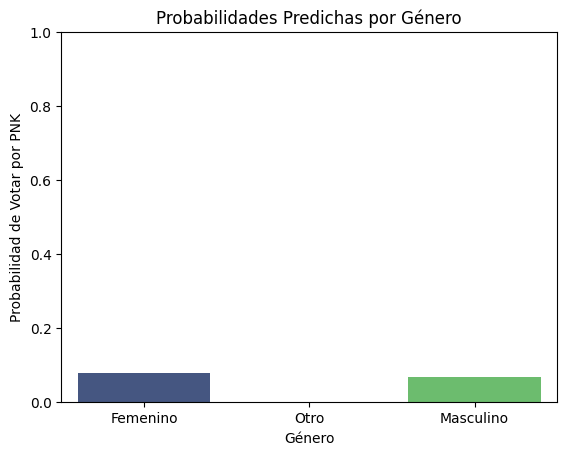

In [ ]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por PNK')  
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

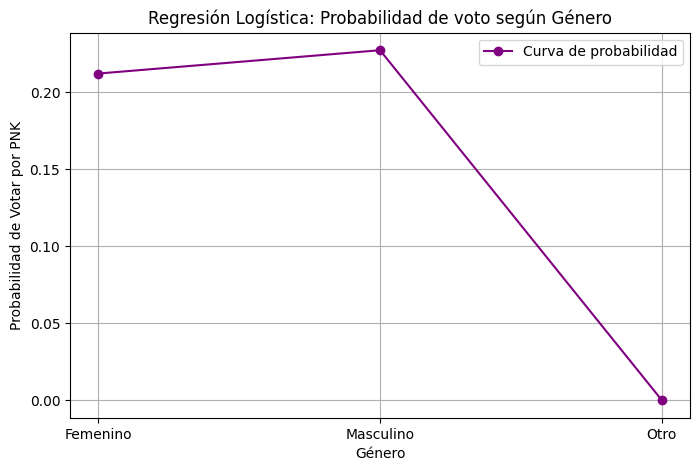

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por PNK')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pip install geopandas matplotlib folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install shapely geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import geopandas as gpd

# Lee el archivo Excel
df_Rosario= pd.read_excel('./Rosario F.xlsx')

# Crea un GeoDataFrame con las columnas de coordenadas
gdf_Rosario = gpd.GeoDataFrame(
    df_Rosario, 
    geometry=gpd.points_from_xy(df_Rosario['Coord1__Longitude'], df_Rosario['Coord1__Latitude'])
)

# Selecciona solo las columnas que te interesan
gdf_Rosario = gdf_Rosario[['Coord1__Latitude', 'Coord1__Longitude', 'RADIO', 'geometry']]

gdf_Rosario = gdf_Rosario.set_crs(epsg=4326)

gdf_Rosario = gdf_Rosario.to_crs(epsg=4326)

print(gdf_Rosario)
print(gdf_Rosario.crs)

     Coord1__Latitude  Coord1__Longitude      RADIO                 geometry
0          -32.881458         -60.695274  820840409  POINT (-60.695 -32.881)
1          -32.882259         -60.693571  820840410  POINT (-60.694 -32.882)
2          -32.884731         -60.692882  820840502  POINT (-60.693 -32.885)
3          -32.884673         -60.693464  820840502  POINT (-60.693 -32.885)
4          -32.918833         -60.703628  820841013  POINT (-60.704 -32.919)
..                ...                ...        ...                      ...
367        -32.941000         -60.688295  821190304  POINT (-60.688 -32.941)
368        -32.970114         -60.653051  821190305   POINT (-60.653 -32.97)
369        -32.907759         -60.752721  820843707  POINT (-60.753 -32.908)
370        -32.942161         -60.639935  820280512   POINT (-60.64 -32.942)
371        -32.957100         -60.637709  820842113  POINT (-60.638 -32.957)

[372 rows x 4 columns]
EPSG:4326


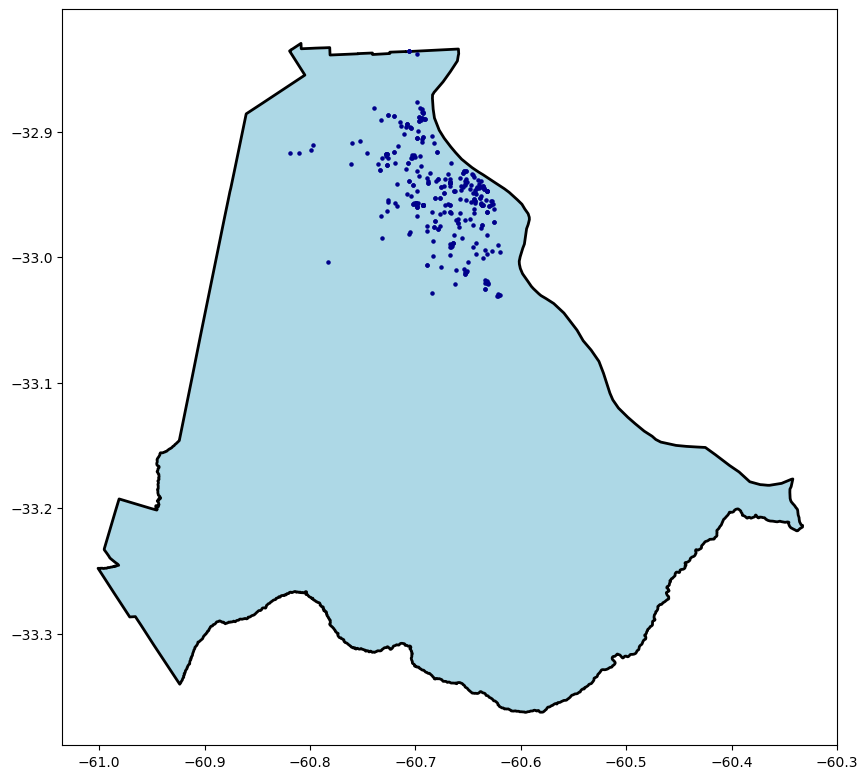

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Lee el archivo Excel
df_Rosario= pd.read_excel('./Rosario F.xlsx')
# Lee el mapa de departamentos
mapa_granrosario = gpd.read_file(r'C:\Users\Candela\Desktop\TPMETODO\Metodo_OP\TP Final\Mapas\departamentos.geojson')


# Crea un GeoDataFrame con las columnas de coordenadas
gdf_Rosario = gpd.GeoDataFrame(
    df_Rosario, 
    geometry=gpd.points_from_xy(df_Rosario['Coord1__Longitude'], df_Rosario['Coord1__Latitude'])
)

# Selecciona solo las columnas que te interesan
gdf_Rosario = gdf_Rosario[['Coord1__Latitude', 'Coord1__Longitude', 'RADIO', 'geometry']]

gdf_Rosario = gdf_Rosario.set_crs(epsg=4326)

gdf_Rosario = gdf_Rosario.to_crs(epsg=4326)

# Filtra el departamento de Rosario
granrosario = mapa_granrosario[mapa_granrosario['NOMBRE'] == 'Rosario']

# Verifica que ambos GeoDataFrames tengan el mismo CRS
if gdf_Rosario.crs != granrosario.crs:
    gdf_Rosario = gdf_Rosario.to_crs(granrosario.crs)

puntosgranrosario = gdf_Rosario[gdf_Rosario.within(granrosario.geometry.iloc[0])]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibuja el mapa del departamento de Rosario
granrosario.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=2)

# Dibuja los puntos que están dentro del departamento
puntosgranrosario.plot(ax=ax, color='darkblue', marker='o', markersize=5)

plt.show()


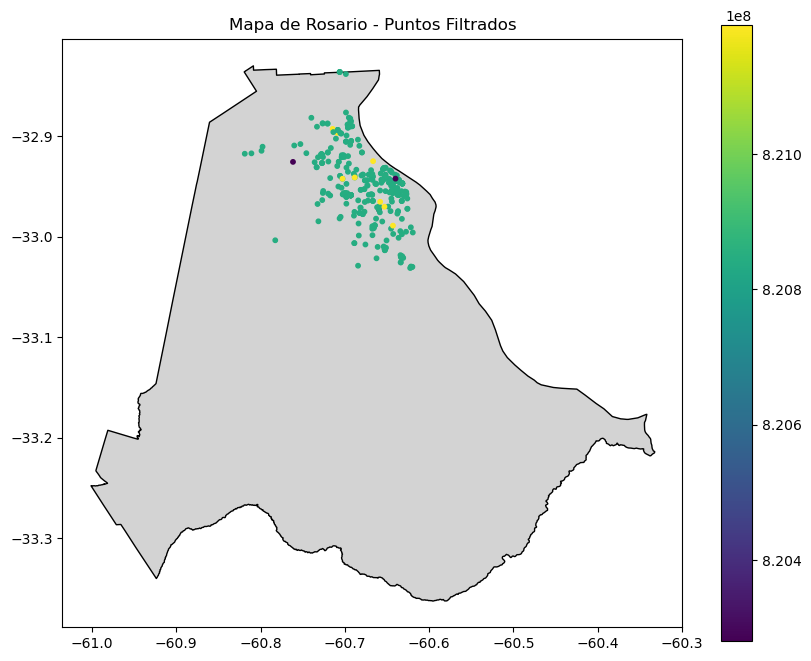

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point  # for outlier filtering with buffer

# Leer datos
df_Rosario = pd.read_excel('./Rosario F.xlsx')
mapa_granrosario = gpd.read_file(r'C:\Users\Candela\Desktop\TPMETODO\Metodo_OP\TP Final\Mapas\departamentos.geojson')

# Crear GeoDataFrame
gdf_Rosario = gpd.GeoDataFrame(df_Rosario, geometry=gpd.points_from_xy(df_Rosario['Coord1__Longitude'], df_Rosario['Coord1__Latitude']))
gdf_Rosario = gdf_Rosario[['Coord1__Latitude', 'Coord1__Longitude', 'RADIO', 'geometry']]
gdf_Rosario = gdf_Rosario.set_crs(epsg=4326)

# Filtrar puntos dentro de Rosario
granrosario = mapa_granrosario[mapa_granrosario['NOMBRE'] == 'Rosario']
puntosgranrosario = gdf_Rosario[gdf_Rosario.within(granrosario.geometry.iloc[0])]

# Detectar y eliminar outliers (ajusta el buffer según tus datos)
buffer_distance = 0.01  # Distancia de buffer en grados decimales
buffer_geometry = granrosario.geometry.iloc[0].buffer(buffer_distance)
outliers = puntosgranrosario[~puntosgranrosario.geometry.within(buffer_geometry)]
filtered_points = puntosgranrosario[puntosgranrosario.geometry.within(buffer_geometry)]

# Visualizar
fig, ax = plt.subplots(figsize=(10, 8))
granrosario.plot(ax=ax, color='lightgray', edgecolor='black')
filtered_points.plot(ax=ax, column='RADIO', cmap='viridis', legend=True, markersize=10)
plt.title('Mapa de Gran Rosario - Radio')
plt.show()